In [1]:
# source: https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

## Data Analysis

In [3]:
data = pd.read_csv("./Data/Churn_Modelling.csv", index_col = "RowNumber")
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


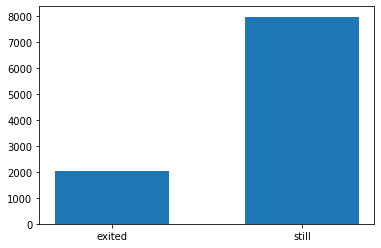

In [5]:
exited, still = data[data['Exited']==1].count()[0], data[data['Exited']==0].count()[0]
plt.bar(['exited', 'still'], [exited, still], width=0.6)
plt.show()

In [6]:
exited/(exited+still)*100 # Percent of exited

20.369999999999997

In [7]:
data['Geography'].unique() # 'France', 'Spain', 'Germany'

array(['France', 'Spain', 'Germany'], dtype=object)

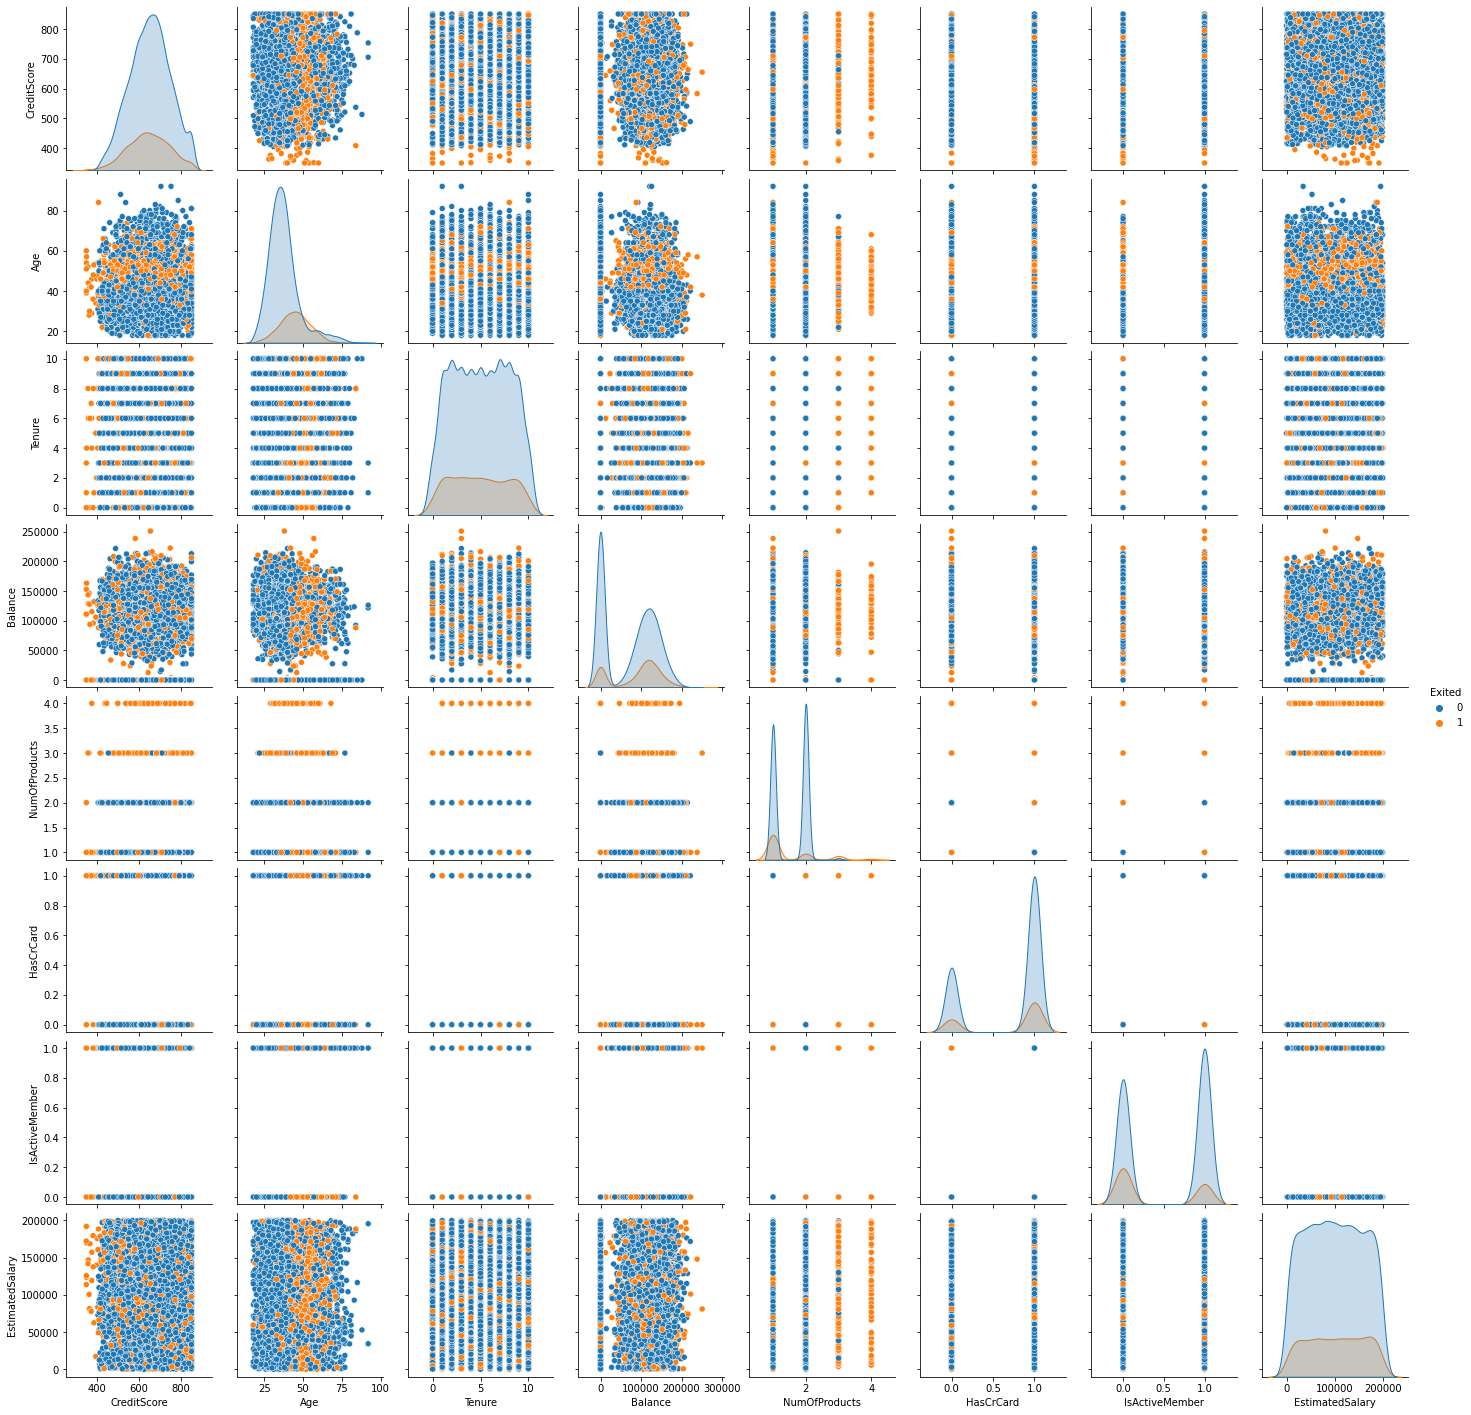

In [8]:
cleaned_data = data.drop(['CustomerId', 'Surname'], axis=1)
sns.pairplot(cleaned_data, hue ='Exited')

<AxesSubplot:xlabel='Geography', ylabel='count'>

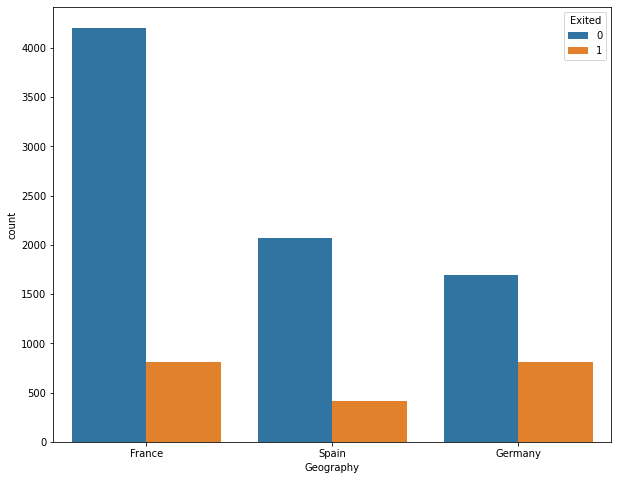

In [9]:
_, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='Geography', hue = 'Exited',data = cleaned_data, ax=ax)

<AxesSubplot:xlabel='NumOfProducts', ylabel='Density'>

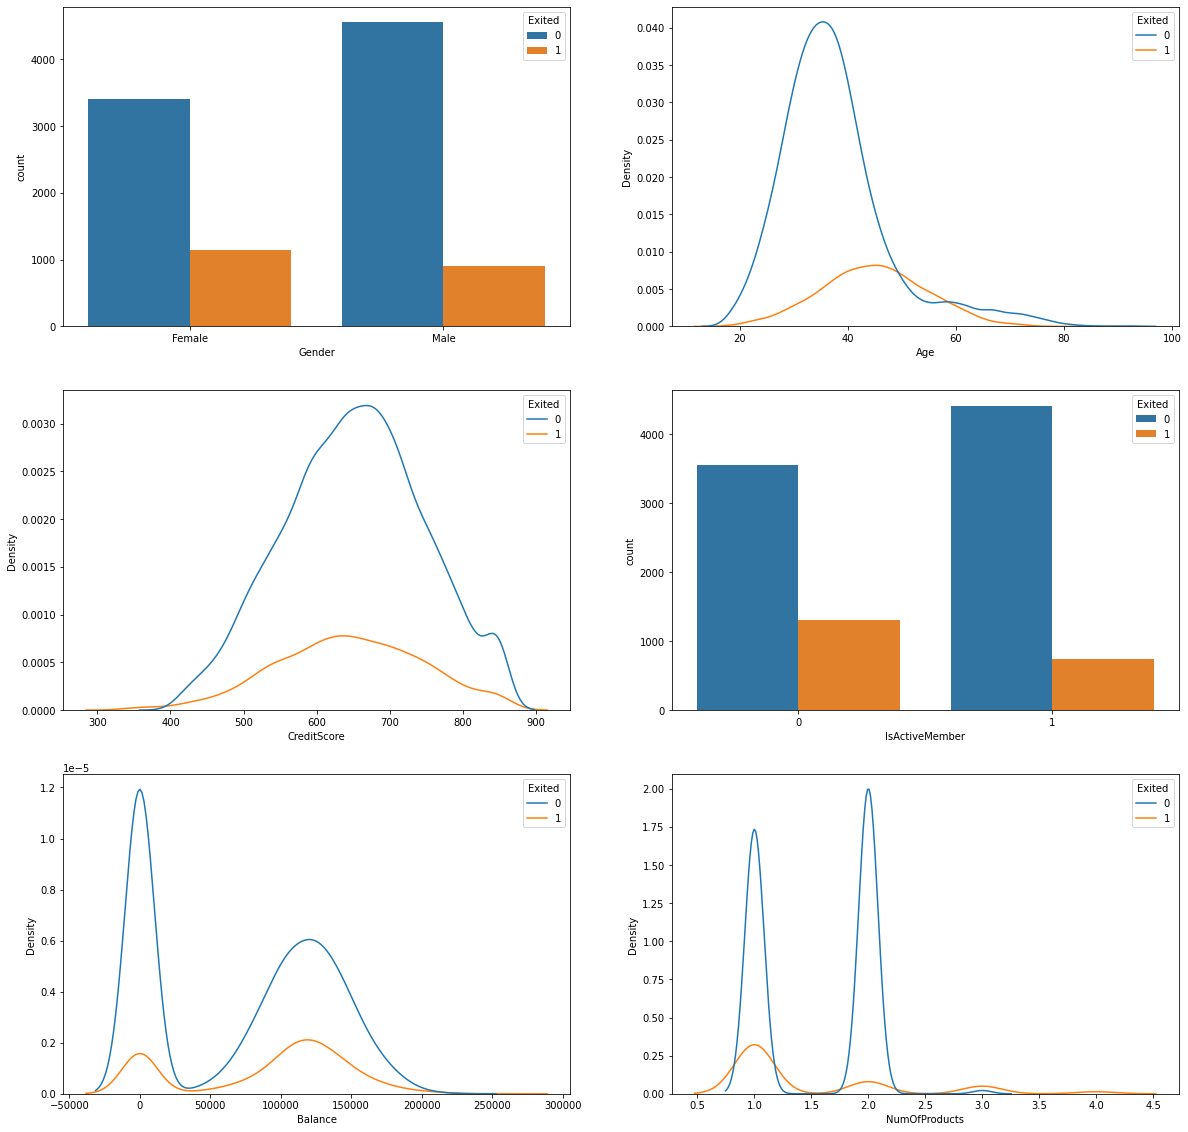

In [10]:
fig, axa = plt.subplots(3, 2, figsize=(20,20))
sns.countplot(x='Gender', hue = 'Exited',data = cleaned_data, ax=axa[0][0])
sns.kdeplot(x='Age', hue = 'Exited',data = cleaned_data, ax=axa[0][1])
sns.kdeplot(x='CreditScore', hue = 'Exited',data = cleaned_data, ax=axa[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = cleaned_data, ax=axa[1][1])
sns.kdeplot(x='Balance', hue = 'Exited',data = cleaned_data, ax=axa[2][0])
sns.kdeplot(x='NumOfProducts', hue = 'Exited',data = cleaned_data, ax=axa[2][1])

<AxesSubplot:xlabel='Exited', ylabel='NumOfProducts'>

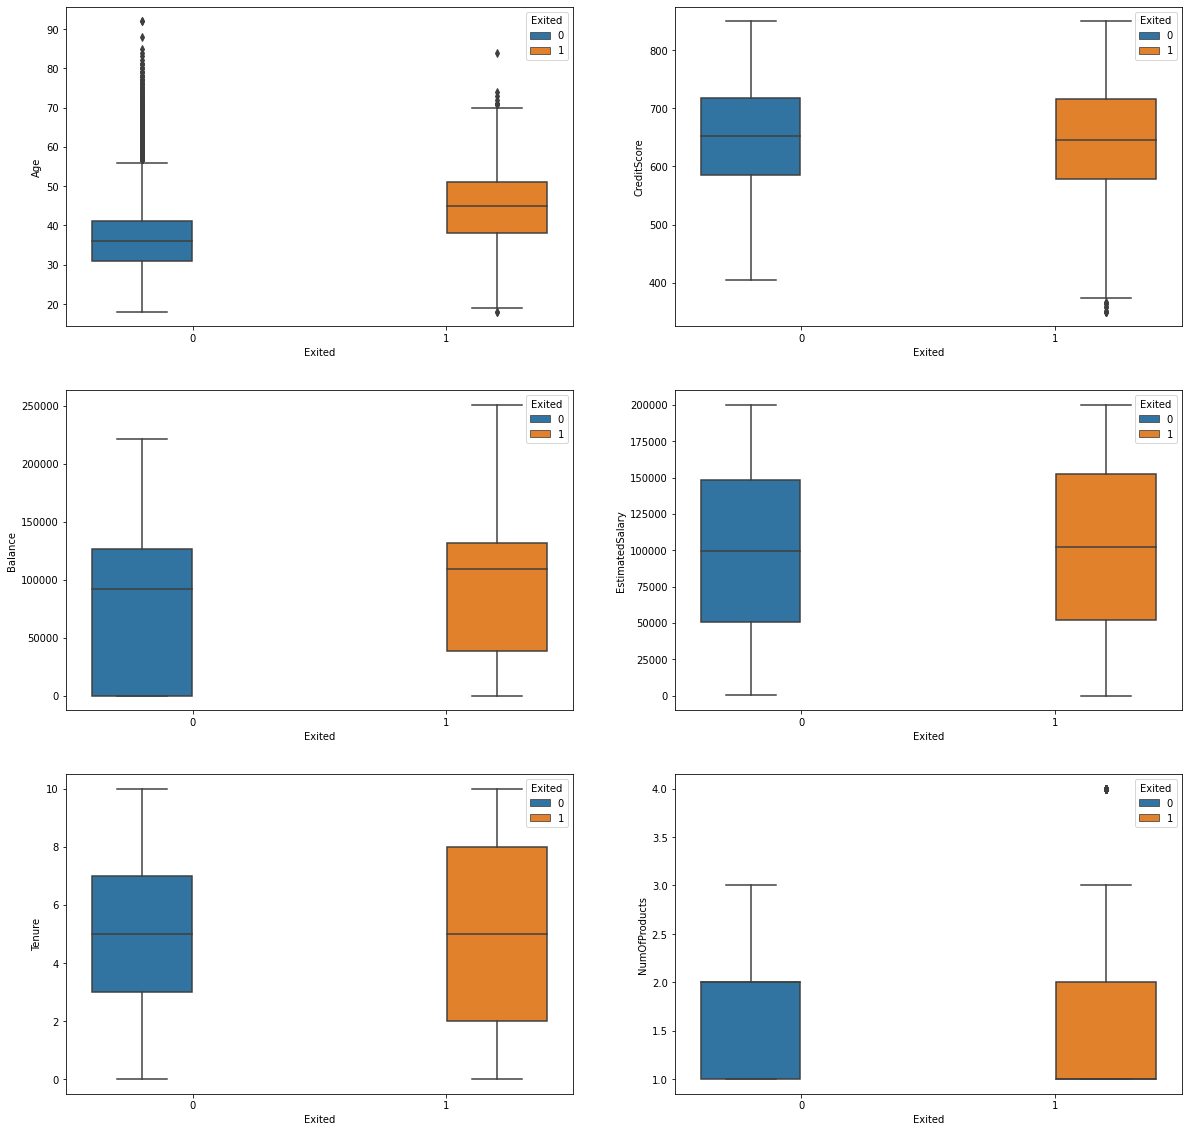

In [11]:
_, axa = plt.subplots(3, 2, figsize=(20,20))
sns.boxplot(y='Age', x = 'Exited', hue = 'Exited',data = cleaned_data, ax=axa[0][0])
sns.boxplot(y='CreditScore', x = 'Exited', hue = 'Exited',data = cleaned_data, ax=axa[0][1])
sns.boxplot(y='Balance', x = 'Exited', hue = 'Exited',data = cleaned_data, ax=axa[1][0])
sns.boxplot(y='EstimatedSalary', x = 'Exited', hue = 'Exited',data = cleaned_data, ax=axa[1][1])
sns.boxplot(y='Tenure', x = 'Exited', hue = 'Exited',data = cleaned_data, ax=axa[2][0])
sns.boxplot(y='NumOfProducts', x = 'Exited', hue = 'Exited',data = cleaned_data, ax=axa[2][1])

Text(0.5, 1.0, 'Correlation')

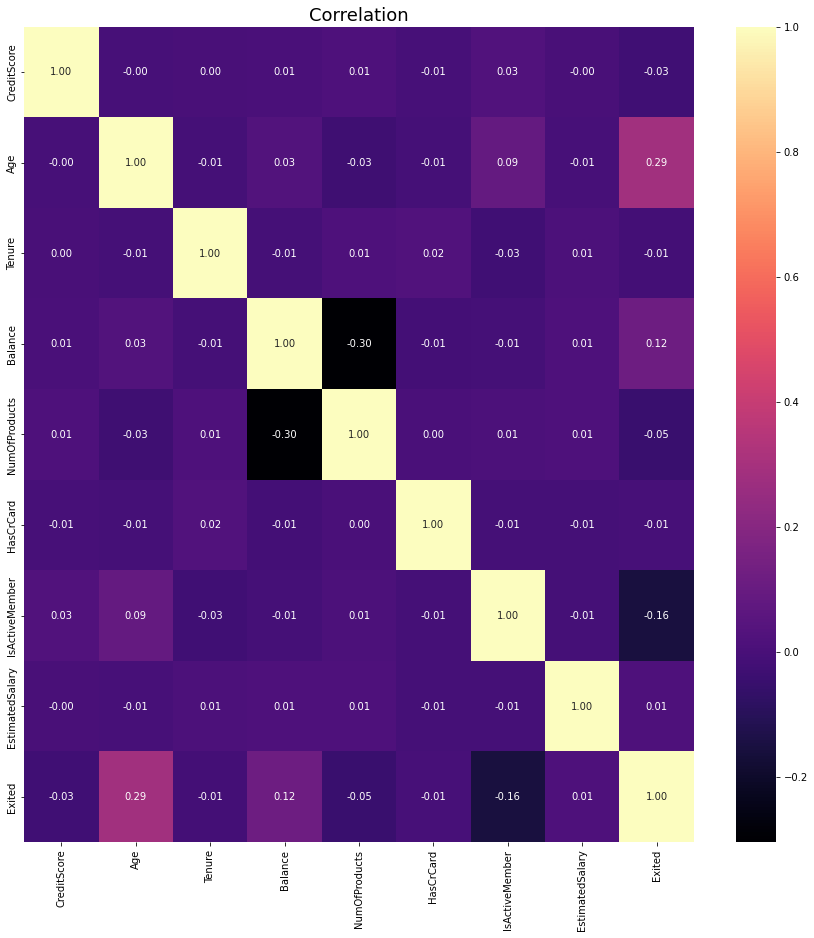

In [12]:
_, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cleaned_data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma")
ax.set_title("Correlation", fontsize=18)

## Feature Engineering

In [13]:
new_data = cleaned_data.copy()
new_data['Balance/Salary'] = new_data['Balance']/new_data['EstimatedSalary']
new_data['Credit/Salary'] = new_data['CreditScore']/new_data['EstimatedSalary']
new_data['Balance/Credit'] = new_data['Balance']/new_data['CreditScore']
new_data['Credit/Age'] = new_data['CreditScore']/new_data['Age']
new_data["StartUsing"] = new_data["Age"] - new_data["Tenure"]
new_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance/Salary,Credit/Salary,Balance/Credit,Credit/Age,StartUsing
RowNumber,,,,,,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.006108,0.000000,14.738095,40
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.005402,137.841875,14.829268,40
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.004406,318.049402,11.952381,34
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.007450,0.000000,17.923077,38
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.010748,147.659788,19.767442,41


In [14]:
numerical_columns = ['CreditScore', 'Age', 'Balance', 'NumOfProducts',
                   'EstimatedSalary', 'Balance/Salary', 'Credit/Salary', 'Balance/Credit', 
                   'Credit/Salary', 'Balance/Credit', 'Credit/Age', 'StartUsing', 'Tenure']
scaler = StandardScaler()
scaler.fit(new_data[numerical_columns])
new_data[numerical_columns] = scaler.transform(new_data[numerical_columns])
new_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance/Salary,Credit/Salary,Balance/Credit,Credit/Age,StartUsing
RowNumber,,,,,,,,,,,,,,,,
1,-0.326221,France,Female,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,-0.035804,-0.042981,-1.187699,-0.583369,0.558471
2,-0.440036,Spain,Female,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,-0.028930,-0.044079,0.173175,-0.566410,0.558471
3,-1.536794,France,Female,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,-0.022868,-0.045631,1.952313,-1.101536,0.008344
4,0.501521,France,Female,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,-0.035804,-0.040891,-1.187699,0.009066,0.375095
5,2.063884,Spain,Female,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,-0.021154,-0.035755,0.270104,0.352133,0.650158


In [15]:
transformer = make_column_transformer((OneHotEncoder(), ['Geography', 'Gender']),remainder='passthrough')
transformed = transformer.fit_transform(new_data)
new_data = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)
new_data.head()

,onehotencoder__Geography_France,onehotencoder__Geography_Germany,onehotencoder__Geography_Spain,onehotencoder__Gender_Female,onehotencoder__Gender_Male,remainder__CreditScore,remainder__Age,remainder__Tenure,remainder__Balance,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember,remainder__EstimatedSalary,remainder__Exited,remainder__Balance/Salary,remainder__Credit/Salary,remainder__Balance/Credit,remainder__Credit/Age,remainder__StartUsing
0,1.0,0.0,0.0,1.0,0.0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1.0,1.0,0.021886,1.0,-0.035804,-0.042981,-1.187699,-0.583369,0.558471
1,0.0,0.0,1.0,1.0,0.0,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.0,1.0,0.216534,0.0,-0.028930,-0.044079,0.173175,-0.566410,0.558471
2,1.0,0.0,0.0,1.0,0.0,-1.536794,0.293517,1.032908,1.333053,2.527057,1.0,0.0,0.240687,1.0,-0.022868,-0.045631,1.952313,-1.101536,0.008344
3,1.0,0.0,0.0,1.0,0.0,0.501521,0.007457,-1.387538,-1.225848,0.807737,0.0,0.0,-0.108918,0.0,-0.035804,-0.040891,-1.187699,0.009066,0.375095
4,0.0,0.0,1.0,1.0,0.0,2.063884,0.388871,-1.041760,0.785728,-0.911583,1.0,1.0,-0.365276,0.0,-0.021154,-0.035755,0.270104,0.352133,0.650158


In [16]:
np.isinf(new_data).any() # False

onehotencoder__Geography_France     False
onehotencoder__Geography_Germany    False
onehotencoder__Geography_Spain      False
onehotencoder__Gender_Female        False
onehotencoder__Gender_Male          False
remainder__CreditScore              False
remainder__Age                      False
remainder__Tenure                   False
remainder__Balance                  False
remainder__NumOfProducts            False
remainder__HasCrCard                False
remainder__IsActiveMember           False
remainder__EstimatedSalary          False
remainder__Exited                   False
remainder__Balance/Salary           False
remainder__Credit/Salary            False
remainder__Balance/Credit           False
remainder__Credit/Age               False
remainder__StartUsing               False
dtype: bool

In [17]:
np.isnan(new_data).any() # False

onehotencoder__Geography_France     False
onehotencoder__Geography_Germany    False
onehotencoder__Geography_Spain      False
onehotencoder__Gender_Female        False
onehotencoder__Gender_Male          False
remainder__CreditScore              False
remainder__Age                      False
remainder__Tenure                   False
remainder__Balance                  False
remainder__NumOfProducts            False
remainder__HasCrCard                False
remainder__IsActiveMember           False
remainder__EstimatedSalary          False
remainder__Exited                   False
remainder__Balance/Salary           False
remainder__Credit/Salary            False
remainder__Balance/Credit           False
remainder__Credit/Age               False
remainder__StartUsing               False
dtype: bool

Text(0.5, 1.0, 'Correlation with new columns')

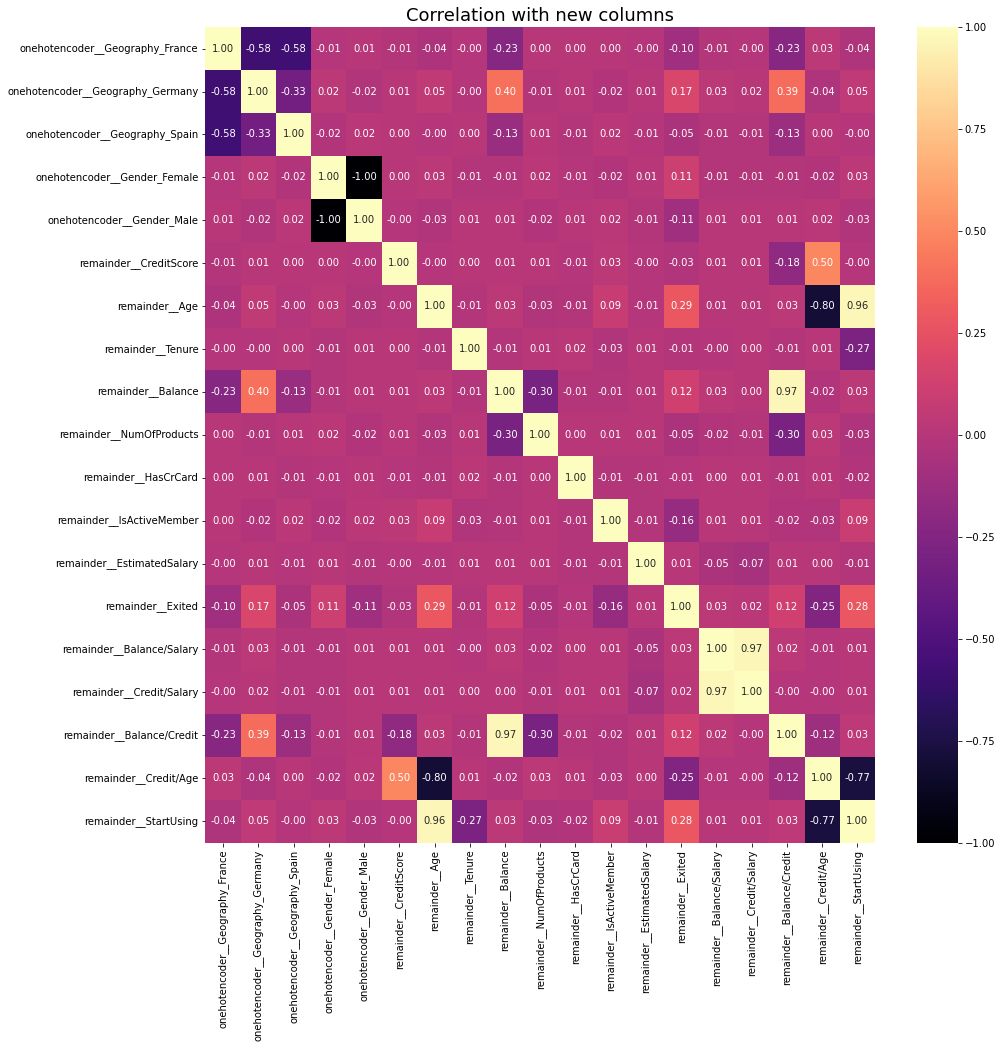

In [18]:
_, ax = plt.subplots(figsize=(15,15))
sns.heatmap(new_data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma")
ax.set_title("Correlation with new columns", fontsize=18)

## Model Training

In [19]:
results = new_data['remainder__Exited']
new_data = new_data.drop('remainder__Exited', axis=1, )
X_train, X_test, y_train, y_test = train_test_split(new_data, results, test_size=0.3, random_state=0)
X_train.columns

Index(['onehotencoder__Geography_France', 'onehotencoder__Geography_Germany',
       'onehotencoder__Geography_Spain', 'onehotencoder__Gender_Female',
       'onehotencoder__Gender_Male', 'remainder__CreditScore',
       'remainder__Age', 'remainder__Tenure', 'remainder__Balance',
       'remainder__NumOfProducts', 'remainder__HasCrCard',
       'remainder__IsActiveMember', 'remainder__EstimatedSalary',
       'remainder__Balance/Salary', 'remainder__Credit/Salary',
       'remainder__Balance/Credit', 'remainder__Credit/Age',
       'remainder__StartUsing'],
      dtype='object')

In [20]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.793

### Dummy classifier perform 0.79

### knn

In [21]:
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), 
    X_train, y_train, 
    param_name="n_neighbors", 
    param_range=[3, 11, 15, 33], cv=10)
print(test_scores.mean(axis=1))
print(train_scores.mean(axis=1))

[0.82357143 0.84128571 0.841      0.841     ]
[0.89615873 0.8612381  0.85712698 0.84701587]


In [22]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
print('train: ', knn.score(X_train, y_train)) # 0.8585
print('test: ', knn.score(X_test, y_test)) # 0.854

train:  0.8585714285714285
test:  0.854


#### Knn best result 0.85, with n_neighbors=15

### linear regression

In [25]:
linear = LinearRegression()
linear.fit(X_train,y_train)
linear.score(X_test, y_test) # 0.15lasso.coef_

0.15041983760250255

In [26]:
linear.coef_ #linear regression doesn`t good for this dataset

array([ 4.63174561e+12,  4.63174561e+12,  4.63174561e+12,  5.01142912e+12,
        5.01142912e+12,  3.44534245e-03, -2.20417626e+11,  6.07835599e+10,
       -3.93176055e-03, -1.69411558e-02, -3.26812350e-03, -1.29529822e-01,
        4.93675897e-03,  2.69408040e-02, -2.08804601e-02,  2.14854448e-02,
       -2.47973595e-02,  2.29230106e+11])

### Lasso regression

In [27]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso.score(X_test,y_test) # 0.14

0.1450563186453122

In [27]:
lasso.coef_

array([-0.        ,  0.07598976, -0.        ,  0.03626381, -0.        ,
       -0.        ,  0.0568027 , -0.        ,  0.00366431, -0.00526897,
       -0.        , -0.08887793,  0.        ,  0.0007742 ,  0.        ,
        0.01818323, -0.01813213,  0.03464569])

### Logistic regression

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test,y_test) # 0.8196

0.8196666666666667

#### logistic regressions perform 0.82

### Decision tree, random forest

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test,y_test) # 0.80

In [30]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test,y_test) # 0.86

0.8623333333333333

#### tree perform 0.80, random forest perform 0.86 

### Support Vector Machines

In [31]:
clf = SVC(kernel='poly', C=100)
clf.fit(X_train, y_train)
clf.score(X_test,y_test) # 0.86

0.8663333333333333

#### SVM perform 0.86

### Gradient boosting

In [32]:
train_scores, test_scores = validation_curve(
    GradientBoostingClassifier(), 
    X_train, y_train, 
    param_name="learning_rate", 
    param_range=[1, 0.75, 0.5, 0.25, 0.05, 0.01, 0.001], cv=10)
print(test_scores.mean(axis=1))
print(train_scores.mean(axis=1))

[0.83042857 0.837      0.84914286 0.859      0.86042857 0.84028571
 0.79771429]
[0.94457143 0.93780952 0.92419048 0.89868254 0.86850794 0.84111111
 0.79771429]


In [34]:
gb = GradientBoostingClassifier(learning_rate=0.05)
gb.fit(X_train, y_train)
gb.score(X_test,y_test) # 0.86

0.8586666666666667

#### GB perform 0.86

## Model fitting

##### Models with good result:
##### KNN: ~0.85
##### Logistic: ~0.82
##### Random forest: ~0.86
##### SVM: ~0.86
##### GB: ~0.86

###### Cells with GridSearchCV running wery long, there are another one with the best parametres under each of them

In [28]:
pf2 = PolynomialFeatures(degree=2)
train_pf2 = pf2.fit_transform(X_train)
test_pf2 = pf2.fit_transform(X_test)

In [50]:
param_grid = {'n_neighbors':[1,3,9,13,15,17,21,25,27,31]}
knn_grid = GridSearchCV(KNeighborsClassifier(),param_grid)
knn_grid.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=17)
0.8437142857142856


In [62]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8523333333333334

### knn best 0.85

In [73]:
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [200,300,500],'tol':[0.00001,0.0001,0.000001]}
log_grid = GridSearchCV(LogisticRegression(),param_grid)
log_grid.fit(X_train,y_train)
print(log_grid.best_estimator_)
print(log_grid.best_score_)

LogisticRegression(C=1, max_iter=200, tol=1e-05)
0.8152857142857142


In [66]:
lr = LogisticRegression(C=1, max_iter=200, tol=1e-05)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8196666666666667

### lr best 0.82

In [70]:
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [200,300,500],'tol':[0.00001,0.0001,0.000001]}
train_pf2 = pf2.fit_transform(X_train)
lr2_grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid)
lr2_grid.fit(train_pf2,y_train)
print(lr2_grid.best_estimator_)
print(lr2_grid.best_score_)

LogisticRegression(C=0.1, max_iter=200, solver='liblinear', tol=1e-05)
0.8600000000000001


In [75]:
lr2 = LogisticRegression(C=0.1, max_iter=200, solver='liblinear', tol=1e-05)
lr2.fit(train_pf2, y_train)
lr2.score(test_pf2, y_test)

0.8613333333333333

### lr with pf=2 best 0.86

In [48]:
param_grid = {'n_estimators':[50,100,200], 'max_depth': [3, 6, 8, 10], 'max_features': [2,6,8,9,11,13],'min_samples_split': [3,6,7,9]}
rand_forest_grid = GridSearchCV(RandomForestClassifier(), param_grid)
rand_forest_grid.fit(X_train,y_train)
print(rand_forest_grid.best_estimator_)
print(rand_forest_grid.best_score_)

RandomForestClassifier(max_depth=8, max_features=11, min_samples_split=7)
0.8642857142857142


In [30]:
rf=RandomForestClassifier(max_depth=8, max_features=11, min_samples_split=7)
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.8653333333333333

In [ ]:
param_grid = {'n_estimators':[50,100,200], 'max_depth': [3, 6, 8, 10], 'max_features': [2,6,8,9,11,13],'min_samples_split': [3,6,7,9]}
rand_forest_grid = GridSearchCV(RandomForestClassifier(), param_grid)
rand_forest_grid.fit(train_pf2,y_train)
print(rand_forest_grid.best_estimator_)
print(rand_forest_grid.best_score_)

In [38]:
rf=RandomForestClassifier(max_depth=10, max_features=6, min_samples_split=7)
rf.fit(train_pf2, y_train)
rf.score(test_pf2,y_test)

0.8653333333333333

### rf best 0.86

In [ ]:
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'kernel': ['poly', 'rbf']}
SVC_grid = GridSearchCV(SVC(), param_grid)
SVC_grid.fit(X_train,y_train)
print(SVC_grid.best_estimator_)
print(SVC_grid.best_score_)

In [42]:
svc=SVC(C=100, gamma=0.1, kernel='poly')
svc.fit(X_train, y_train)
svc.score(X_test,y_test)

0.863

### SVC best 0.86

In [ ]:
param_grid = {'learning_rate': [0.001,0.05,0.1,0.5], 'max_depth': [3,5,7],'min_samples_split': [1,2,3], 'n_estimators': [200,500,700],'subsample': [0.3,0.5,0.8]}
GB_grid = GridSearchCV(GradientBoostingClassifier(), param_grid)
GB_grid.fit(X_train,y_train)
print(GB_grid.best_estimator_)
print(GB_grid.best_score_)

In [47]:
svc=GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=200,subsample=0.8)
svc.fit(X_train, y_train)
svc.score(X_test,y_test)

0.8676666666666667

#### GB best 0.86